# SENTIMENT ANALYSIS



In [ ]:
#Release: 1.1907.1601

# Library

For this lab, we will need ``wordcloud`` library.
Use pip to install the library from Anaconda prompt : ``pip install wordcloud``.

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output

# Read Data

In [2]:
data = pd.read_csv('gabungan.csv', sep='|')
# Choose the column we will be using
data = data[['text','sentiment']]
len(data)

4294

In [3]:
data[:10]

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas...,Positif
4,@ndusell saya simpati tan,Positif
5,@telkomsel terima kasih penjelasannya mimin,Positif
6,"@indosatcare terima kasih ya, untuk informasinya.",Positif
7,@Telkomsel yess yess,Positif
8,@Telkomsel ok thanks,Positif
9,thanks @IndosatCare koneksi internet sudah nor...,Positif


In [4]:
# Bagi dataset menjadi data training dan testing
train, test = train_test_split(data,test_size = 0.2)
# Hapus sentiment yang netral
train = train[train.sentiment != "Neutral"]

train_pos = train[ train['sentiment'] == 'Positif']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negatif']
train_neg = train_neg['text']

In [5]:
train_pos

3225        TNI Buleleng Tanamkan Pendidikan Bela Negara 
4216                    Kekuatan Abu Sayyaf Turun Drastis
4227    FOTO 10.000 Peserta Ikuti Apel Bela Negara di ...
3102    Bahkan  di Bengkulu sudah ada kantor Perwakila...
100                  @Telkomsel oke saya tunggu hasilnya.
2988    TweetBerita   Kemenhan  Kebutuhan Bandan Intel...
3468    Panglima TNI tegaskan Intel Kemenhan tidak aka...
2911    TRIBUN Menhan Utamakan Negosiasi Sebelum Lanca...
3450    Kemenhan perlu mempunyai badan intelijen utk m...
3028    Berita  Kemenhan  Kebutuhan Bandan Intelijen P...
3903                     TNI Siapkan Kopassus dan Kostrad
2777    Koramil Kampar Laksanakan MoU Wawasan Kebangsa...
3270    Menhan Hapus Ospek di Sekolah dengan Bela Negara 
4198     Menhan Klaim Kesepakatan Trilateral Sudah Ber...
3315    Indonesia   MENHAN  Pokemon Go Ganggu Kenyaman...
2958    Pindad luncurkan empat senjata baru di Kemenhan  
2939    Presiden Joko Widodo  KOMISI I DPR RI  KEMENHA...
1661          

In [6]:
train_neg

3938    Serangan Militer Filipina Lumpuhkan Separuh Pa...
4035    Indonesia, Malaysia dan Filipina Sepakati 3 Bu...
1502                              @Telkomsel terlalu lama
1206    @IndosatCare ya quota utamanya yg 4G / 3G ?Blm...
2121    Pegawai Kemenhan Terlibat Peredaran Upal Ryami...
1808    @Telkomsel benar min, gak bisa nelpon dan cek ...
1448    @indosatcare tolong ditangani dgn bijak ya. In...
1169    @IndosatCare jaringan 4G nya gk keluar daerah ...
1524    @IndosatCare sinyalnya kenapa ya hilang terus ...
2064    Tujuh WNI disandera Abu Sayyaf Ryamizard Menha...
3639    WNI Kembali Disandera, DPR Curiga Filipina Sed...
1980    gw liat sih RR ini pinter juga memposisikan ki...
2107    Menhan Di Dunia Kemenhan yang Nggak Ada Inteli...
1203      @IndosatCare sinyal nye oleng sejak tadi mlm ni
1963    Anehnya ortu ngasih makan ngasih duit kagak ad...
4034    Indonesia, Malaysia, Philippines discuss marit...
1757    @Telkomsel ayolaaaaahh kirimin ke no saya sms ...
2098      Masi

In [7]:
#augment the stopwords with nonstandard twitter words
stopwords_set = set(stopwords.words("indonesia"))
stopwords_aug = {"ya","yak","iya","yg","ga","gak","gk","udh","sdh","udah","dah","nih","ini","deh","sih","dong","donk",
                 "sm","knp","utk","yaa","tdk","gini","gitu","bgt","gt","nya","kalo","cb","jg","jgn","gw","ge",
                 "sy","min","mas","mba","mbak","pak","kak","trus","trs","bs","bisa","aja","saja","no",
                 "w","g","gua","gue","emang","emg","wkwk","dr","kau","dg","gimana","apapun","apa",
                 "klo","yah","banget","pake","terus","krn","jadi","jd","mu","ku","si","hehe",
                 "tp","pa","lu","lo","lw","tw","tau","karna","kayak","ky","lg","untuk","tuk","dg","dgn"}
stopwords_all = stopwords_set.union(stopwords_aug)

In [8]:
#stopwords_set

Positive words


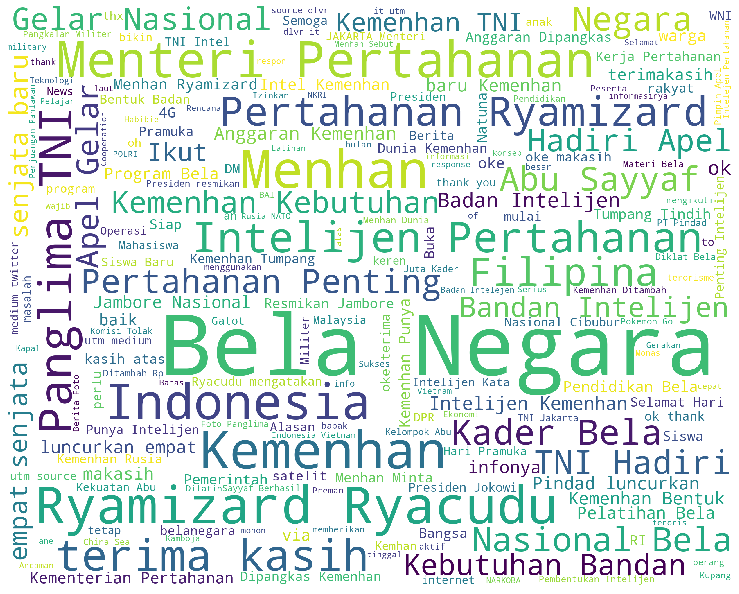

Negative words


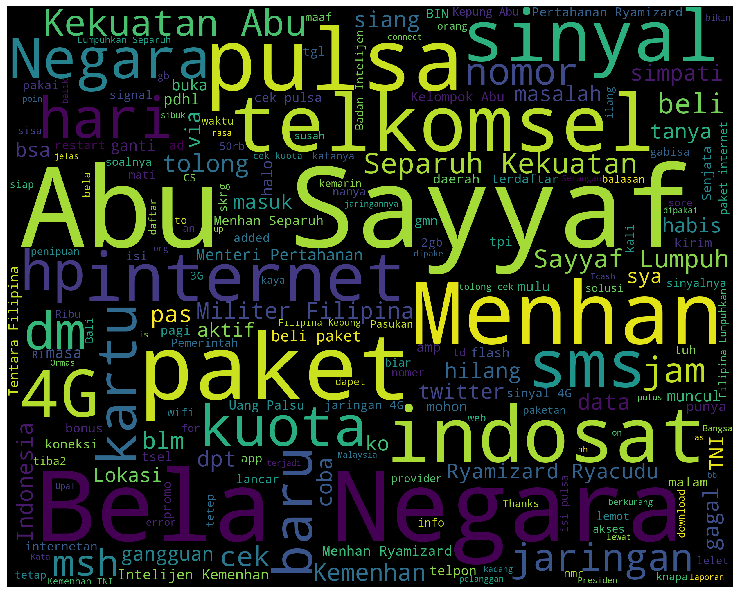

In [9]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_all,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [10]:
tweets = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets.append((words_cleaned,row.sentiment))

test_pos = test[ test['sentiment'] == 'Positif']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negatif']
test_neg = test_neg['text']

In [11]:
test_pos

3137                            Pegawai  pejabat MenHan  
2884     BELA NEGARA KEHORMATAN BAGI SETIAP WARGA NEGARA 
3515           KUNKER KEMENHAN RI KE MAKO YONIF     WP   
2867    Pelajar SMA Sukses Mengikuti Kader Bela Negara...
3009    Buka Puasa Bersama Organisasi Bin Alumni PCTA ...
3210    Berita Pelatihan Bela Negara Di Kupang Sejumla...
4261      Presiden resmikan Jambore Nasional X di Cibubur
4283       DPR Pesimis RUU Keamanan Nasional Bisa Digarap
3026    Media Indo  Kemenhan  Kebutuhan Bandan Intelij...
10                 @Telkomsel @Yoppy_Efge terimakasih min
15      @IndosatCare kartu 4G nya udah diterima, mksh ...
3031    Kemenhan RI   Rp     Triliun Digunakan Untuk B...
1715                        @IndosatCare oke akan sy coba
2816    Jika nkri itu mmg ada jika bela negara itu ada...
3075    Menhan  Pembangunan Pangkalan Militer Natuna D...
3880    Buka Jambore Nasional, Jokowi: Sebarkan Semang...
2942    DPR Desak Kemenhan Investigasi Jatuhnya Heliko...
3311    LDII d

In [12]:
test_neg

3611    Militer Filipina Lumpuhkan Separuh Kekuatan Ab...
2033    Isu PKI dihembuskan utk muluskan program bela ...
2104    Menhan Di Dunia Kemenhan yang Nggak Ada Inteli...
3985                                   Aduh, Narkoba Lagi
1174    @IndosatCare apakah ada gangguan pada koneksi ...
1450    @Telkomsel aku sampai beli kuota flash lagi ga...
1865                          @Telkomsel pilih kasih ah 😑
3653    TNI Tunggu Filipina dan Malaysia Gempur Abu Sa...
1246    Halo @Telkomsel sy sdh melapor beberapa kali s...
1883    @mfahmia2705 @sripujiyanti  CS @Telkomsel di t...
1303    @Telkomsel ga usalah.krn semuanya sama mas.mau...
3636              Tak Tepat DPR Jadi Inisiator RUU Kamnas
3982    Markas Abu Sayyaf di Basilan, Dibersihkan Mi...
1060    @IndosatCare : untung sy ga pernah niat pake i...
2057    Menhan harus mainin ini tiap sore Asymmetric w...
971     @Telkomsel kok tarif paket gaulnya naik lagi j...
2173    Menhan Rusia Pecat Beberapa Komandan Armada Ba...
4002          

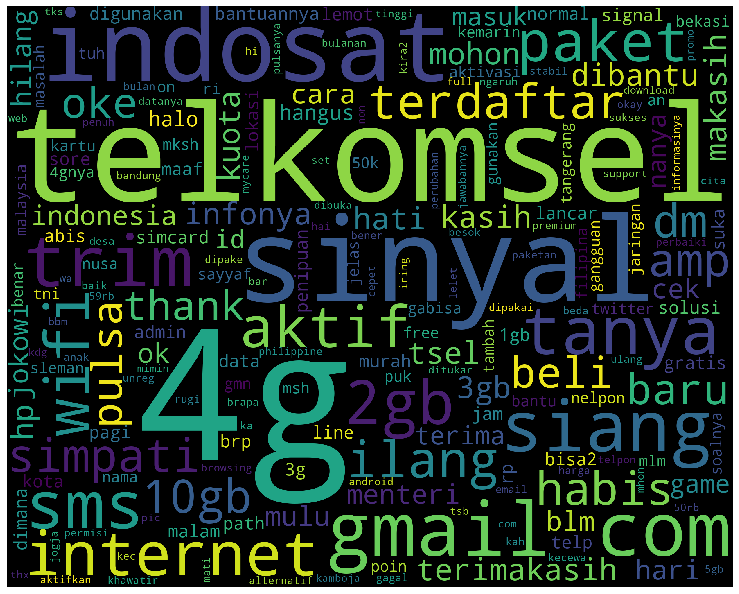

[Negatif]: 261/119 
[Positif]: 266/107 


In [14]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


wordcloud_draw(w_features)

# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negatif'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positif'): 
        pos_cnt = pos_cnt + 1
        
print('[Negatif]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positif]: %s/%s '  % (len(test_pos),pos_cnt))


In [15]:
w_features

dict_keys(['dan', 'indonesia', 'tidak', 'sendiri', 'jika', 'perang', 'itu', 'terjadi', 'serangan', 'militer', 'filipina', 'lumpuhkan', 'separuh', 'pasukan', 'abu', 'sayyaf', 'tni', 'buleleng', 'tanamkan', 'pendidikan', 'bela', 'negara', 'kekuatan', 'turun', 'drastis', 'dalam', 'masa', 'tenggang', 'apakah', 'sms', 'collect', 'bisa', 'gunakan..??', 'indonesia,', 'malaysia', 'sepakati', 'butir', 'penting', 'sikapi', 'sepak', 'terjang', 'foto', '10.000', 'peserta', 'ikuti', 'apel', 'silang', 'monas', 'min.', 'mau', 'tanya.', 'bonus', 'pulsa', 'ini', 'maksudnya', 'gmna', 'ya?', 'terlalu', 'lama', 'bahkan', 'bengkulu', 'sudah', 'ada', 'kantor', 'perwakilan', 'kemenhan', 'saya', 'rasa', 'terkait', 'ttg', 'rencana', 'menjadikan', 'enggano', 'pangkalan', 'rusia', 'sanggah', 'pelanggaran', 'transparansi', 'eropaelshintatop', '081347402783*082153681575,', 'quota', 'utamanya', '?blm', 'pnjelasanya', '???hnya', 'itu;', 'utama', 'ingin', 'punya', 'intelijenini', 'kata', 'panglima', 'jakartapanglima'

In [16]:
nltk.FreqDist(get_words_in_tweets(tweets))

FreqDist({'negara': 644, 'bela': 589, 'kemenhan': 534, 'saya': 394, 'dan': 322, 'bisa': 294, 'ada': 285, 'intelijen': 231, 'menhan': 229, 'tni': 225, ...})

In [17]:
tweets

[(['dan', 'indonesia', 'tidak', 'sendiri', 'jika', 'perang', 'itu', 'terjadi'],
  'Netral'),
 (['serangan',
   'militer',
   'filipina',
   'lumpuhkan',
   'separuh',
   'pasukan',
   'abu',
   'sayyaf'],
  'Negatif'),
 (['tni', 'buleleng', 'tanamkan', 'pendidikan', 'bela', 'negara'], 'Positif'),
 (['kekuatan', 'abu', 'sayyaf', 'turun', 'drastis'], 'Positif'),
 (['jika',
   'tidak',
   'dalam',
   'masa',
   'tenggang',
   'apakah',
   'sms',
   'collect',
   'bisa',
   'gunakan..??'],
  'Netral'),
 (['indonesia,',
   'malaysia',
   'dan',
   'filipina',
   'sepakati',
   'butir',
   'penting',
   'sikapi',
   'sepak',
   'terjang',
   'abu',
   'sayyaf'],
  'Negatif'),
 (['foto',
   '10.000',
   'peserta',
   'ikuti',
   'apel',
   'bela',
   'negara',
   'silang',
   'monas'],
  'Positif'),
 (['min.',
   'mau',
   'tanya.',
   'bonus',
   'pulsa',
   'ini',
   'maksudnya',
   'gmna',
   'ya?'],
  'Netral'),
 (['terlalu', 'lama'], 'Negatif'),
 (['bahkan',
   'bengkulu',
   'sudah',
  

In [18]:
#To save the trained claassifier, do the following
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [19]:
#To reload it:
f = open('my_classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()